### Exploratory Data Analysis

### Data Pre-Processing

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)





In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.

Date is also not useful because we already have season column which is also almost equal to date.

City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.

'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.

In [6]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [7]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64


In [8]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [9]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [10]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [11]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [12]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.

Filling player_dismissed null values with 'No wicket', didmissal_Kind null values with also No Wicket

In [13]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [14]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.

In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.

And in remaining columns max value is in certain limit only. So i can say there are not much outliers.

### Q1) Who will win today match KXIP vs KKR?

In [83]:
#First Lets see head-head results
df_KKR_KXIP = df_matches[((df_matches['team1'] == 'Kings XI Punjab') | (df_matches['team1'] == 'Kolkata Knight Riders')) & 
                        ((df_matches['team2'] == 'Kings XI Punjab') | (df_matches['team2'] == 'Kolkata Knight Riders'))] 

#plotting KKR and KXIP wins against each other
import plotly.graph_objs as go
df_winner = df_KKR_KXIP[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by KXIP and KKR against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

KKR won more matches than KXIP but IPL team will change every two years, So lets look at individual players performance as well.

In [100]:
#Lets look at how many player of the match awards won by current KKR and KXIP players.
#Note: I am taking top 8 palyers from both teams
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_KXIP = df_matches[(df_matches['player_of_match'] == 'KL Rahul') | (df_matches['player_of_match'] == 'MA Agarwal') |
                                (df_matches['player_of_match'] == 'GJ Maxwell') | (df_matches['player_of_match'] == 'CH Gayle') |
                                (df_matches['player_of_match'] == 'Mohammed Shami') | (df_matches['player_of_match'] == 'Mandeep Singh') |
                                (df_matches['player_of_match'] == 'CJ Jordan') | (df_matches['player_of_match'] == 'M Ashwin') ]

print("Total number of man of matches won by present Punjab players is", df_man_of_match_KXIP.shape[0],'\n')

#In KKR i am not picking russell because he is injured may be he will not play today match.
df_man_of_match_KKR = df_matches[(df_matches['player_of_match'] == 'KD Karthik') | (df_matches['player_of_match'] == 'RA Tripathi') |
                                (df_matches['player_of_match'] == 'PJ Cummins') | (df_matches['player_of_match'] == 'SP Narine') |
                                (df_matches['player_of_match'] == 'EJG Morgan') | (df_matches['player_of_match'] == 'N Rana') |
                                (df_matches['player_of_match'] == 'S Gill') | (df_matches['player_of_match'] == 'Kuldeep Yadav')]


print("Total number of man of matches won by present KKR players is", df_man_of_match_KKR.shape[0])

Total number of man of matches won by present Punjab players is 36 

Total number of man of matches won by present KKR players is 21


**Conclusion :-**

Suppose if one team players won more man of the match awards than other team player means that team has more match winners.

Here KXIP players won more man ot the matches. So i can say that KXIP has more match winner than KKR.

So i am predicting KXIP will win today match.

### Q2) How many dot balls will be bowled in the entire match?

In [105]:
#Filtering KXIP vs KKR matches 
df_KXIPvsKKR = df_deliveries[(df_deliveries['batting_team'] == 'Kings XI Punjab') & (df_deliveries['bowling_team'] == 'Kolkata Knight Riders')|
                            (df_deliveries['batting_team'] == 'Kolkata Knight Riders') & (df_deliveries['bowling_team'] == 'Kings XI Punjab')]

# Now calculating dot balls in each match
df_dotball = df_KXIPvsKKR[df_KXIPvsKKR['total_runs'] == 0]
df_dotball =  df_dotball.groupby('match_id')['total_runs'].count()
df_dotball =  df_dotball.to_frame().reset_index()
df_dotball.rename(columns = {'total_runs':'dot_balls'}, inplace = True)
df_dotball.head()                      

,match_id,dot_balls
0,11,79
1,48,75
2,81,88
3,112,92
4,123,72


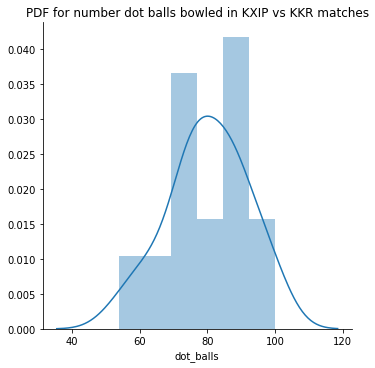

count     25.000000
mean      80.040000
std       11.749043
min       54.000000
25%       75.000000
50%       80.000000
75%       88.000000
max      100.000000
Name: dot_balls, dtype: float64

In [106]:
#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_dotball,size=5) \
   .map(sns.distplot, "dot_balls") \
   .add_legend();

plt.title("PDF for number dot balls bowled in KXIP vs KKR matches")
plt.show();

#Printing central tendency and percentile values
df_dotball['dot_balls'].describe()

**Conclusion :-**



1.   By looking at PDF i can say that most of the dot balls are greater than 60 and 70-90 balls probability is very high.
2.   And 75% avlues are less than 88 balls and mean or median is 80. 

So according to above analysis i am choosing dot balls in the range of 60-90.



### Q3) How many wickets will fall 90th ball to 120th ball of both the innings.

91st ball to 120th ball means death overs(16-20). But in question it showing 90th ball(15th over last ball). Actually fall of wickets in death depends on individual bowler. Suppose if he is very good death bowler like bumrah or rabada then they can easily get atleast 2wickets.

Because of that i am analysing individual bowler performance who will bowl in death overs from both teams.

Shami,Jordan from KXIP and Lockie ferguson, Pat cummins from KKR are death bowlers in this year tournamnent. I know Russell also will bowl in death overs but he is injured not playing today according to espn news.

In [48]:
#Fltering shami wickets from 15.6 to 20 overs.
#I am considering runouts also becuase at the end we have to predict total wickets taken by team. 
df_shami = df_deliveries[(df_deliveries['bowler'] == 'Mohammed Shami') & 
                         ((df_deliveries['over'] >= 16) | ((df_deliveries['over'] == 15) & (df_deliveries['ball'] == 6)))]

#creating one more column i.e if player gets out then the value is 1 otherwise 0.                                               
df_shami['wickets'] =  df_shami['player_dismissed'].apply(lambda x:0 if x == 'No Wicket' else 1) 

#Here i am claculating number wickets taken by shami in each match including runouts
wickets_per_match = df_shami.groupby('match_id')['wickets'].sum()
print("Average number of wickets taken by shami in death overs is",wickets_per_match.median())


Average number of wickets taken by shami in death overs is 1.0


In [58]:
#Fltering Chris Jordan wickets from 15.6 to 20 overs.
#I am considering runouts also becuase at the end we have to predict total wickets taken by team. 
df_jordan = df_deliveries[(df_deliveries['bowler'] == 'CJ Jordan') & 
                         ((df_deliveries['over'] >= 16) | ((df_deliveries['over'] == 15) & (df_deliveries['ball'] == 6)))]

#creating one more column i.e if player gets out then the value is 1 otherwise 0.                                               
df_jordan['wickets'] =  df_jordan['player_dismissed'].apply(lambda x:0 if x == 'No Wicket' else 1) 

#Here i am claculating number wickets taken by jordan in each match including run outs
wickets_per_match = df_jordan.groupby('match_id')['wickets'].sum()
print("Average number of wickets taken by Jordan in death overs is",wickets_per_match.mean())

Average number of wickets taken by Jordan in death overs is 0.7142857142857143


In [53]:
#Fltering Pat Cummins wickets from 15.6 to 20 overs.
#I am considering runouts also becuase at the end we have to predict total wickets taken by team. 
df_cummins = df_deliveries[(df_deliveries['bowler'] == 'PJ Cummins') & 
                         ((df_deliveries['over'] >= 16) | ((df_deliveries['over'] == 15) & (df_deliveries['ball'] == 6)))]

#creating one more column i.e if player gets out then the value is 1 otherwise 0.                                               
df_cummins['wickets'] =  df_cummins['player_dismissed'].apply(lambda x:0 if x == 'No Wicket' else 1) 

#Here i am claculating number wickets taken by cummins in each match including run outs
wickets_per_match = df_cummins.groupby('match_id')['wickets'].sum()
print("Average number of wickets taken by Pat Cummins in death overs is",wickets_per_match.median())

Average number of wickets taken by Pat Cummins in death overs is 1.0


In [59]:
#Fltering Lockie Ferguson wickets from 15.6 to 20 overs.
#I am considering runouts also becuase at the end we have to predict total wickets taken by team. 
df_ferguson = df_deliveries[(df_deliveries['bowler'] == 'LH Ferguson') & 
                         ((df_deliveries['over'] >= 16) | ((df_deliveries['over'] == 15) & (df_deliveries['ball'] == 6)))]

#creating one more column i.e if player gets out then the value is 1 otherwise 0.                                               
df_ferguson['wickets'] =  df_ferguson['player_dismissed'].apply(lambda x:0 if x == 'No Wicket' else 1) 

#Here i am claculating number wickets taken by Ferguson in each match including run outs
wickets_per_match = df_ferguson.groupby('match_id')['wickets'].sum()
print("Average number of wickets taken by Pat Cummins in death overs is",wickets_per_match.median())

Average number of wickets taken by Pat Cummins in death overs is 0.0


**Conclusion :-**

Shami, cummins, jordan took 1 wicket per match in death overs and Lockie averageg is 0 wickets in death overs. 

So according to above analysis i am predicting 0-3 wickets will fall from 90th ball to 120th ball.


### Q4) What would be Glenn Maxwell Contribution to the team total?

In [67]:
#Lets filter out Maxwell rows when he played for punjab
#Lets claculate the number of runs scored by KXIP and Maxwell
df_maxwell = df_deliveries[(df_deliveries["batsman"] == 'GJ Maxwell') & (df_deliveries["batting_team"] == 'Kings XI Punjab')]  
common = df_deliveries.merge(df_maxwell,on=['match_id','match_id'])

df_KXIP = df_deliveries[(df_deliveries.match_id.isin(common.match_id))&(df_deliveries.match_id.isin(common.match_id))]
df_KXIP = df_KXIP[df_KXIP['batting_team'] == 'Kings XI Punjab']  

#Calculating Maxwell runs and total team runs when maxwell was in playing 11
maxwell_runs = df_maxwell.groupby('match_id')['batsman_runs'].sum()
KXIP_runs = df_KXIP.groupby('match_id')['total_runs'].sum()
#Converting above two series objects into dataframe
df_maxwell_runs = maxwell_runs.to_frame().reset_index()
df_KXIP_runs = KXIP_runs.to_frame().reset_index()
df_maxwell_runs.rename(columns = {'batsman_runs':'Maxwell_runs'}, inplace = True)
#Merging both dataframe on match_id
df_KXIP_Maxwell = pd.merge(df_maxwell_runs, df_KXIP_runs, left_on='match_id',right_on='match_id', how='outer')
df_KXIP_Maxwell.head()

,match_id,Maxwell_runs,total_runs
0,4,44,164
1,8,43,150
2,11,25,170
3,15,0,137
4,19,10,154


Above dataframe has columns like Maxwell_runs  and total_runs. I.e how many runs maxwell scored and what is the team total in the same match.

In [74]:
#Now calculating Percentage of runs Maxwell scored in each match out of total runs.

df_KXIP_Maxwell['Maxwell_contribution(%)'] = round((df_KXIP_Maxwell['Maxwell_runs'] * 100) / (df_KXIP_Maxwell['total_runs']), 2)

df_KXIP_Maxwell.head()

,match_id,Maxwell_runs,total_runs,Maxwell_contribution,Maxwell_contribution(%)
0,4,44,164,26.83,26.83
1,8,43,150,28.67,28.67
2,11,25,170,14.71,14.71
3,15,0,137,0.00,0.00
4,19,10,154,6.49,6.49


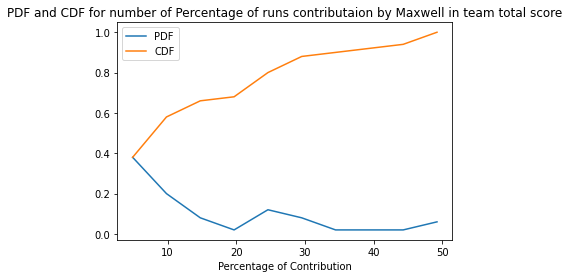

In [76]:
#Plotting Cumulative sum of area under curve upto gives you cdf
import numpy as np
leg = ["PDF", "CDF"]
counts, bin_edges = np.histogram(df_KXIP_Maxwell['Maxwell_contribution(%)'], bins=10,density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(leg)
plt.xlabel('Percentage of Contribution')
plt.title("PDF and CDF for number of Percentage of runs contributaion by Maxwell in team total score")
plt.show();

**Conclusion :-**



1.   From PDF plot i can say his contribution is very high from 3 - 10. From 15 onwards his contribution is very less except at 25.
2.   By looking at CDF plot i can say 60% of contributions are less than 10.

So i can easily predict that his contribution in today match also lies between 0-8% .



### Q5) How many No-balls will be bowled in the match?

In [82]:
#Taking KXIP vs KKR matches
df_KXIPvsKKR = df_deliveries[(df_deliveries['batting_team'] == 'Kings XI Punjab') & (df_deliveries['bowling_team'] == 'Kolkata Knight Riders')|
                             (df_deliveries['batting_team'] == 'Kings XI Punjab') & (df_deliveries['bowling_team'] == 'Kolkata Knight Riders')]

# Calcualting no-balls in each KXIP vs KKR match.
noballs_permatch = df_KXIPvsKKR.groupby('match_id')['noball_runs'].sum()

noballs_permatch.describe()

count    25.0
mean      0.2
std       0.5
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       2.0
Name: noball_runs, dtype: float64

**Conclusion :-**

In total 25 matches between KXIP vs KKR the average of no-balls i.e Mean, Median is 0 and 75% of values are also 0.

So according to above observation in today match also they will bowl 0-1 no-ball.

In [104]:
dfd = df_deliveries[(df_deliveries['match_id'] == 48) & (df_deliveries['total_runs'] == 0)]
dfd.shape[0]

75